In [1]:
import numpy as np
import os

In [155]:
band=[]
path_to_dir='D:/dataset/Sentinel_Roads/Ascii/roads/'
for fname in list(os.walk(path_to_dir))[0][2]:
    try:
        print(fname)
        with open(path_to_dir+fname) as f:
            content = f.readlines()
        row=[]
        for i in range(6,len(content)):
            a=content[i].split(" ")
            j=0
            
            column=[]
            while(j<155):
                try:
                    column.append((int)(a[j]))
                except:
                    column.append(0)
                #print((str)((int)(a[j])))
                j=j+1

            row.append(column[10:-11])
        band.append(row)
    except:
        print("error")
    

raster_roads_non_roads.asc
Sentinel_B2_Blue_10m_Test1_ascii
Sentinel_B3_G_10m_Test1_ascii
Sentinel_B4_R_10m_Test1_ascii
Sentinel_B8_NIR_10m_Test1_ascii


In [156]:
mask=np.array(band[0])
band=np.transpose(np.array(band[1:]),(1,2,0))
#print(band.shape,mask.shape)
print(mask)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [157]:
feature=[]
label=[]
for i in range(0,96,12):
    for j in range(1,133,12):
        feature.append(band[i:i+12,j:j+12])
        label.append(mask[i:i+12,j:j+12])
feature=np.array(feature)
label=np.array(label)
print(feature.shape)

(88, 12, 12, 4)


In [158]:
n_classes=2
a = np.arange(n_classes)
b = np.zeros((n_classes, n_classes))
b[np.arange(n_classes), a] = 1


x=feature
y=b[label]

print(x.shape,y.shape)

(88, 12, 12, 4) (88, 12, 12, 2)


In [159]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(x.reshape(88,-1))
X=X.reshape(88,12,12,4)
print(X[0])

[[[0.0514776  0.05651596 0.05837425 0.87368421]
  [0.22847682 0.27280626 0.20385514 0.63022889]
  [0.4270557  0.32741117 0.40225933 0.52254428]
  [0.46070727 0.45785877 0.66247858 0.77682597]
  [0.3726647  0.45509499 0.48865154 0.57249071]
  [0.09647303 0.06819984 0.13540291 0.34594223]
  [0.23309179 0.34972678 0.2979798  0.59747987]
  [0.40441176 0.49853944 0.50069541 0.4630004 ]
  [0.47332421 0.48318043 0.42939297 0.40032591]
  [0.54172367 0.55341675 0.56257901 0.57640311]
  [0.25583658 0.25116279 0.25742574 0.47121771]
  [0.1000834  0.14858841 0.13455657 0.5290675 ]]

 [[0.0374376  0.08156712 0.06415279 0.63725861]
  [0.19828641 0.23324151 0.22539894 0.54849935]
  [0.27939793 0.27173913 0.28257687 0.51764218]
  [0.17603687 0.19847328 0.27294686 0.49864917]
  [0.18889971 0.18220339 0.16147164 0.54977651]
  [0.0509915  0.04660046 0.04607206 0.44143847]
  [0.31578947 0.27205101 0.34518167 0.57857893]
  [0.64849354 0.54145343 0.63662375 0.56342183]
  [0.49324324 0.4527027  0.58677686 0.

D:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [160]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Conv2DTranspose,BatchNormalization



In [193]:
model=Sequential()

In [194]:
model.add(Conv2D(kernel_size=(3,3),strides=(1,1),padding="same",activation='relu',input_shape=(12,12,4),filters=64))

In [195]:
model.add(BatchNormalization())

In [196]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [197]:
model.add(Conv2D(kernel_size=(3,3),strides=(1,1),activation='relu',padding="same",filters=64))
model.add(BatchNormalization())

In [198]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same',activation='relu') )
model.add(BatchNormalization())

In [199]:
model.add(Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same',activation='relu') )
model.add(Conv2D(2,(1,1),strides=(1,1),padding='same',activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 12, 12, 64)        2368      
_________________________________________________________________
batch_normalization_14 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 6, 6, 64)          256       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 6, 6, 64)          16448     
__________

In [200]:
print(X.shape,y.shape)
model.fit(X,y,epochs=20)

(88, 12, 12, 4) (88, 12, 12, 2)
Epoch 1/20
88/88 [==============================] - 2s 20ms/step - loss: 0.6928 - acc: 0.5460
Epoch 2/20
88/88 [==============================] - 0s 465us/step - loss: 0.6321 - acc: 0.6597
Epoch 3/20
88/88 [==============================] - 0s 430us/step - loss: 0.5860 - acc: 0.7391
Epoch 4/20
88/88 [==============================] - 0s 476us/step - loss: 0.5460 - acc: 0.7971
Epoch 5/20
88/88 [==============================] - 0s 431us/step - loss: 0.5108 - acc: 0.8349
Epoch 6/20
88/88 [==============================] - 0s 499us/step - loss: 0.4801 - acc: 0.8493
Epoch 7/20
88/88 [==============================] - 0s 453us/step - loss: 0.4541 - acc: 0.8529
Epoch 8/20
88/88 [==============================] - 0s 454us/step - loss: 0.4292 - acc: 0.8553
Epoch 9/20
88/88 [==============================] - 0s 453us/step - loss: 0.4076 - acc: 0.8557
Epoch 10/20
88/88 [==============================] - 0s 465us/step - loss: 0.3882 - acc: 0.8569
Epoch 11/20
88/88 

In [169]:
predict=model.predict(X)

In [170]:
predict.shape

(88, 12, 12, 2)

In [171]:
np.argmax(predict,3)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 0, ..., 0, 0, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [201]:
patch=np.argmax(predict,3)
print(patch.shape)

imk=0
count=0
imgk=2
flag=True
for i in range(0,96,12):
    
    fl=True
    kn=0
    for j in range(1,133,12):
        #print(p[count].shape)
        #print(kn)
        
        if fl==True:
            imgk=patch[count]
            fl=False
        else:
            imgk=np.concatenate((imgk,patch[count]),axis=1)
            #print(imgk.shape)
        count=count+1
        
    if(flag ==True):
        imk=imgk
        flag=False
    else:
        imk=np.concatenate((imk,imgk),axis=0)
        
    #print(imk.shape)
    
        
        
print(count)
print(imk.shape)

(88, 12, 12)
88
(96, 132)


In [202]:
xx=[]
yy=[]
c=[]
d=[]
for i in range(96):
    for j in range(132):
        xx.append(j)
        yy.append(i)
        c.append(imk[i,j])
        d.append(mask[i,j])


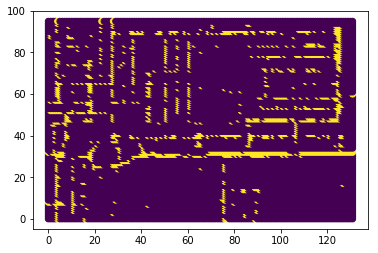

In [203]:
plt.scatter(np.array(xx),np.array(yy),c=np.array(c))

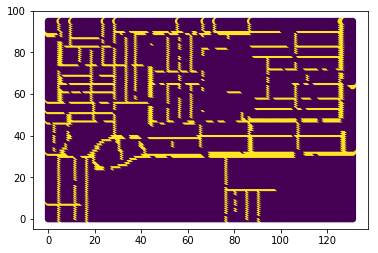

In [204]:
plt.scatter(np.array(xx),np.array(yy),c=np.array(d))